# Titanic Project
## Baseline model
### Prediction of survival rate using 9 variables

For this analysis we use the <b>Titanic Kaggle Competition</b> dataset found on the Kaggle Data Repository at the
following location:

<a href=https://www.kaggle.com/c/titanic/data>Titanic Kaggle Competition Dataset</a>

The objective of the analysis is to classify survivors of the Titanic disaster of 1912 according to survival.

We aim to achieve this by following the ML pipeline approach of deploying a variety of ML techniques to build a
final predictive model. This particular analysis comprises of 4 notebooks as follows:

 1. <i>titanic_baseline</i> - <b>This notebook</b>, baseline predictive model (quick and dirty) to compare later
 results against
 2. <i>titanic_eda</i> - Exploratory Descriptive Analysis (EDA)
 3. <i>titanic_feature</i> - Perform feature engineering
 4. <i>titanic_model</i> - Build final model

We hope to gain valuable insights by following this process. The various steps in the process can be elaborated on as
follows (the various notebooks will focus on different parts of the process as indicated):

- Load data (<i>all notebooks</i>)
- Prepare data
    - Clean data (<i>notebook 2</i>)
        - Missing values
        - Outliers
        - Erroneous values
    - Explore data (<i>notebook 2</i>)
        - Exploratory descriptive analysis (EDA)
        - Correlation analysis
        - Variable cluster analysis
    - Transform Data (<i>notebook 3</i>)
        - Engineer features
        - Encode data
        - Scale & normalise data
        - Impute data (if not done in previous steps)
        - Feature selection/ importance analysis
- Build model (<i>notebooks 1 & 4</i>)
    - Model selection
    - Data sampling (validation strategy, imbalanced classification)
    - Hyperparameter optimisation
- Validate model (<i>notebooks 1 & 4</i>)
    - Accuracy testing
- Analysis of results (<i>notebook 1 & 4</i>)
    - Response curves
    - Accuracy analysis
    - Commentary

The data dictionary for this dataset is as follows:

| Variable | Definition | Key |
|----------|------------|-----|
| survival | Survival	| 0 = No, 1 = Yes |
| pclass   | Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd |
|sex | Sex | male, female |
|Age | Age in years | Continuous |
|sibsp | # of siblings / spouses aboard the Titanic | 0, 1, 2, ..|
|parch | # of parents / children aboard the Titanic | 0, 1, 2 ..|
|ticket | Ticket number | PC 17599, STON/O2. 3101282, 330877 |
|fare | Passenger fare | Continuous |
|cabin | Cabin number | C123, C85, E46 |
|embarked | Port of Embarkation	| C = Cherbourg, Q = Queenstown, S = Southampton |

Let us start the analysis for <b>notebook 1</b>!

Our approach for this notebook will be to take shortcuts i.e. drop variables that require a lot of pre-processing, 
e.g. unstructured text, or where replacement of missing values is required, without any thought to the best strategy.
We will also not do any feature engineering or attempt to understand the data (we will do this in the next notebook).
We will build 3 quick models to get an idea of the strength of the signal in the data as well as where there might be
issues with the data, or obvious areas for improvement for the model. The models we will build are the following:

 1. Logistic regression: Bread and butter classification model - want to get an idea of how a linear model performs
 2. Multi-layer Perceptron (MLP): Understand how a simple non-linear model performs
 3. Decision Tree: Provide visual analysis of variable importance and strength of association
 4. Random Forest: Model is better at dealing with categorical variables that have not been pre-processed, ascertain
 gains of pre-processing in next steps

We will use the scikit-learn libraries to build the prototype models from first principles. In later notebooks we will
use Keras and PyTorch to build the final models.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from src.visualization.visualize_titanic import plot_confusion_matrix, plot_roc_curve, plot_feature_importance, \
    plot_feature_importance_log, plot_feature_importance_dec, plotVar, plotAge, plotContinuous, plotCategorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<div class="alert alert-block alert-info">
<b>Load data</b>
</div>

In [2]:
# Import data
df_train = pd.read_csv('../data/external/train.csv', header = None, names = ['passenger_id', 'survived', 'p_class', 'name',
                                                                       'sex', 'age', 'sib_sp', 'parch', 'ticket',
                                                                       'fare', 'cabin', 'embarked'], index_col=False,
                 usecols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], skiprows=1, sep=',', skipinitialspace=True)

#### Train Data

In [3]:
df_train.head(20)
print(df_train.shape)


,passenger_id,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


(891, 12)


In [4]:
# Import data
df_test = pd.read_csv('../data/external/test.csv', header = None, names = ['passenger_id', 'p_class', 'name', 'sex',
                                                                           'age', 'sib_sp', 'parch', 'ticket',
                                                                           'fare', 'cabin', 'embarked'],
                      index_col=False, usecols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], skiprows=1, sep=',',
                      skipinitialspace=True)

#### Test Data

In [5]:
df_test.head(20)
print(df_test.shape)
df_orig = df_test.copy()

,passenger_id,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


(418, 11)


The first thing to note is that the dataset read from csv file has 891 rows and 12 data columns. This is different to
 the Kaggle data dictionary claiming 891 rows and 10 data columns.

The two extra fields are name and ticket. These unstructured text variables will require pre-processing and hence I
leave them out for the moment. We will also leave cabin out, as it requires pre-processing too.  Excluding the
dependent variable we therefore have 9 feature variables.

Let us do minimal exploration of the data and then start building the baseline models!
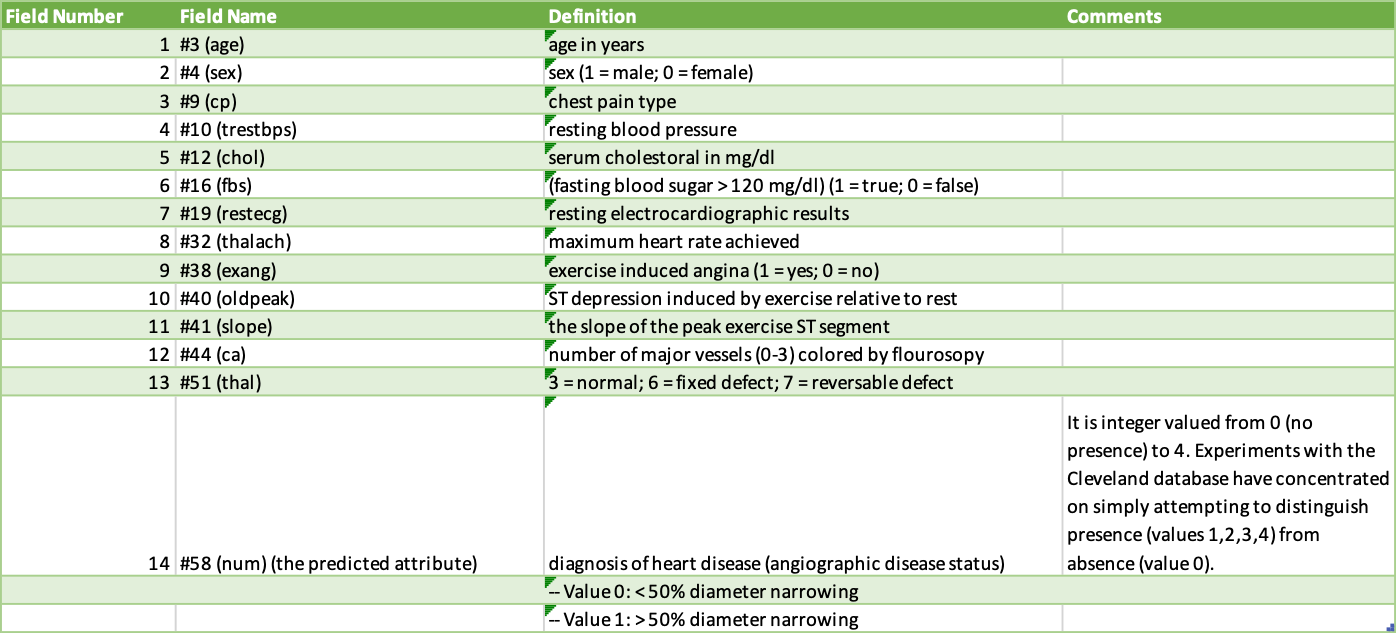

<div class="alert alert-block alert-info">
<b>Basic Data Cleaning</b>
</div>

In [6]:
# Create first stab at an improvement, start with the obvious variables to create a quick model. Leave ticket out for
# now, as some parsing will be necessary
df_train = df_train.loc[:, ['survived', 'p_class', 'sex', 'age', 'sib_sp', 'parch', 'fare', 'cabin', 'embarked']]

In [7]:
df_test = df_test.loc[:, ['p_class', 'sex', 'age', 'sib_sp', 'parch', 'fare', 'cabin', 'embarked']]

In [8]:
# Type of data
print(df_train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   p_class   891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sib_sp    891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   cabin     204 non-null    object 
 8   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB
None


In [9]:
# Type of data
print(df_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   p_class   418 non-null    int64  
 1   sex       418 non-null    object 
 2   age       332 non-null    float64
 3   sib_sp    418 non-null    int64  
 4   parch     418 non-null    int64  
 5   fare      417 non-null    float64
 6   cabin     91 non-null     object 
 7   embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB
None


From the high level checks we can already see that there are missing values in the following fields: age, cabin, fare
 and embarked.

We will impute these values with simple measures (median, mode). We will revisit this at a later stage. During later
stages we will do EDA before removing missing values, and find more meaningful ways to handle missing values, for now
 we forge ahead!

In [10]:
# Check for null values
print(df_train.isnull().sum())

# Actual null values
df_train[df_train.isnull().any(axis=1)]

survived      0
p_class       0
sex           0
age         177
sib_sp        0
parch         0
fare          0
cabin       687
embarked      2
dtype: int64


,survived,p_class,sex,age,sib_sp,parch,fare,cabin,embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,3,female,26.0,0,0,7.9250,NaN,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
7,0,3,male,2.0,3,1,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,NaN,S
885,0,3,female,39.0,0,5,29.1250,NaN,Q
886,0,2,male,27.0,0,0,13.0000,NaN,S
888,0,3,female,NaN,1,2,23.4500,NaN,S


In [11]:
# Check for null values for test data
print(df_test.isnull().sum())
# Actual null values
df_test[df_test.isnull().any(axis=1)]

p_class       0
sex           0
age          86
sib_sp        0
parch         0
fare          1
cabin       327
embarked      0
dtype: int64


,p_class,sex,age,sib_sp,parch,fare,cabin,embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...
412,3,female,28.0,0,0,7.7750,NaN,S
413,3,male,NaN,0,0,8.0500,NaN,S
415,3,male,38.5,0,0,7.2500,NaN,S
416,3,male,NaN,0,0,8.0500,NaN,S


177 null values for age and 2 for embarked for training data.
86 null values for age and 1 for fare for testing data.

We will substitute missing values for age with the median values to allow for skewness in the distribution or
possible outliers, it is the most robust measure for central tendency. For embarked we will use the mode seeing as it
 is a categorical variable with few classes.

In [12]:
# Replace missing values for training set
df_train = df_train.copy()
median = df_train['age'].median()
df_train['age'].fillna(median, inplace=True)
print("Number of null values in age column: {}".format(df_train['age'].isnull().sum()))

mode = df_train['embarked'].mode()
df_train['embarked'].fillna(mode.iloc[0], inplace=True)
print("Number of null values in embarked column: {}".format(df_train['embarked'].isnull().sum()))
print("Dataframe dimension: {}".format(df_train.shape))

Number of null values in age column: 0
Number of null values in embarked column: 0
Dataframe dimension: (891, 9)


In [13]:
# Replace missing values for test set
df_test = df_test.copy()
median = df_test['age'].median()
df_test['age'].fillna(median, inplace=True)
print("Number of null values in age column: {}".format(df_test['age'].isnull().sum()))

median = df_test['fare'].median()
df_test['fare'].fillna(median, inplace=True)
print("Number of null values in fare column: {}".format(df_test['fare'].isnull().sum()))
print("Dataframe dimension: {}".format(df_test.shape))
df_test = df_test.copy()

Number of null values in age column: 0
Number of null values in fare column: 0
Dataframe dimension: (418, 8)


Now our set is finally ready for further analysis - albeit a bit of a black box hack. We will now do some very limited
EDA just to get a feel for the data. We will elaborate on this substantively in the next notebook.

<div class="alert alert-block alert-info">
<b>Cursory exploration of data</b>
</div>

We start by looking at the number of unique records per variable.

In [14]:
print(df_train.nunique())

survived      2
p_class       3
sex           2
age          88
sib_sp        7
parch         7
fare        248
cabin       147
embarked      3
dtype: int64


There are no columns with only one value. We therefore retain all columns for ML purposes as there is enough
variability to warrant using the data. There are many variables with fewer than 10 levels which could be considered
as categorical. Based on our initial assessment of the data we will work with levels of measurement for the data as
follows:

- p_class (ordinal) - we will revisit type of encoding later
- sex (binary) - recode (female - yes or no)
- age (continuous)
- sib_sp (ordinal) - check correlation - revisit encoding
- parch (ordinal) - check correlation - revisit encoding
- fare (continuous)
- embarked (nominal) - recode (one hot encode) - probably categorical

At this point it seems as if we mainly have nominal and binary categorical data. We need to One Hot Encode one
variable i.e. embarked. We will leave the ordinal data as is for the initial analysis i.e. label encode it. Next we
look at the distribution of the data.

We now separate continuous and categorical variables for further analysis.

In [15]:
# Separate continuous and categorical variables
names_con = ('fare', 'age')
names_con_plot = ('survived', 'fare', 'age')
names_cat = ('survived', 'p_class', 'sex', 'sib_sp', 'parch', 'embarked')
names_cat_test = ('p_class', 'sex', 'sib_sp', 'parch', 'embarked')

df_train_con = df_train.loc[:, names_con]
df_train_con_plot = df_train.loc[:, names_con_plot]
df_train_cat = df_train.loc[:, names_cat]

df_test_con = df_test.loc[:, names_con]
df_test_cat = df_test.loc[:, names_cat_test]

# Plotting label dictionary
plot_con = [('fare', 'Fare'),
            ('age', 'Age')]
plot_con_plot = [('survived', 'Survived'),
            ('fare', 'Fare'),
            ('age', 'Age')]
plot_cat = ['survived', ['Yes', 'No'],
            ('p_class', ['1st', '2nd', '3rd']),
            ('sex', ['Male', 'Female']),
            ('sib_sp', '# siblings or spouses'),
            ('parch', '# parents or children'),
            ('embarked', ['Cherbourg', 'Queenstown', 'Southampton'])]

We can already see that we only have two continuous variables here. A tree model would be better suited to this
problem due to all the categorical variables, unless we do significant feature engineering to ensure the categorical
features are optimally encoded, transformed and scaled for a linear model or neural network.

Let's continue with the analysis.

### Survival Rate

0    549
1    342
Name: survived, dtype: int64
0    61.6%
1    38.4%
Name: survived, dtype: object
0    0.616162
1    0.383838
Name: survived, dtype: float64




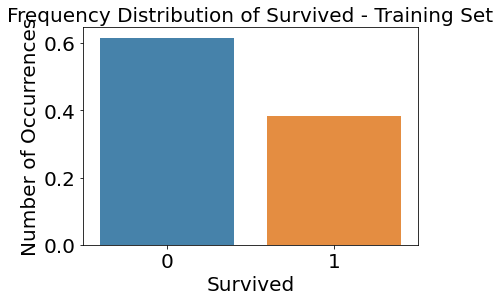

In [16]:
outcome_counts = df_train_cat['survived'].value_counts()
print(outcome_counts)
outcome_counts = df_train_cat['survived'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
print(outcome_counts)
outcome_counts = df_train_cat['survived'].value_counts(normalize = True)
print(outcome_counts)

print("\n")

# Plot outcome counts.
ax = sns.barplot(x=outcome_counts.index, y=outcome_counts.values, alpha=0.9)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
#ax.title.set_size(45)
ax.tick_params('y', labelsize = 20);
ax.tick_params('x', labelsize = 20);
plt.title('Frequency Distribution of Survived - Training Set', fontsize=20)
plt.ylabel('Number of Occurrences')
plt.xlabel('Survived')
plt.show();

We have fairly unbalanced classes here. 38% of passengers survived and 62% died. This curiously does not correspond to
the survival rate quoted in the background information of around 68%? We need to investigate this inconsistency...
We need to also revisit the unbalanced classes at a later stage.

A positive class of 38% of the data is however more than enough to build a very accurate classifier if the signal in
the data is strong enough, so we will forge ahead.

In [17]:
# Class level counts for categorical variables.
# TODO: Calculate percentages here.
for variable in names_cat:
    print(df_train_cat[variable].value_counts(normalize = True).mul(100).round(1).astype(str) + '%')

0    61.6%
1    38.4%
Name: survived, dtype: object
3    55.1%
1    24.2%
2    20.7%
Name: p_class, dtype: object
male      64.8%
female    35.2%
Name: sex, dtype: object
0    68.2%
1    23.5%
2     3.1%
4     2.0%
3     1.8%
8     0.8%
5     0.6%
Name: sib_sp, dtype: object
0    76.1%
1    13.2%
2     9.0%
5     0.6%
3     0.6%
4     0.4%
6     0.1%
Name: parch, dtype: object
S    72.5%
C    18.9%
Q     8.6%
Name: embarked, dtype: object


In [18]:
# Enable textual variables to numeric by encoding.



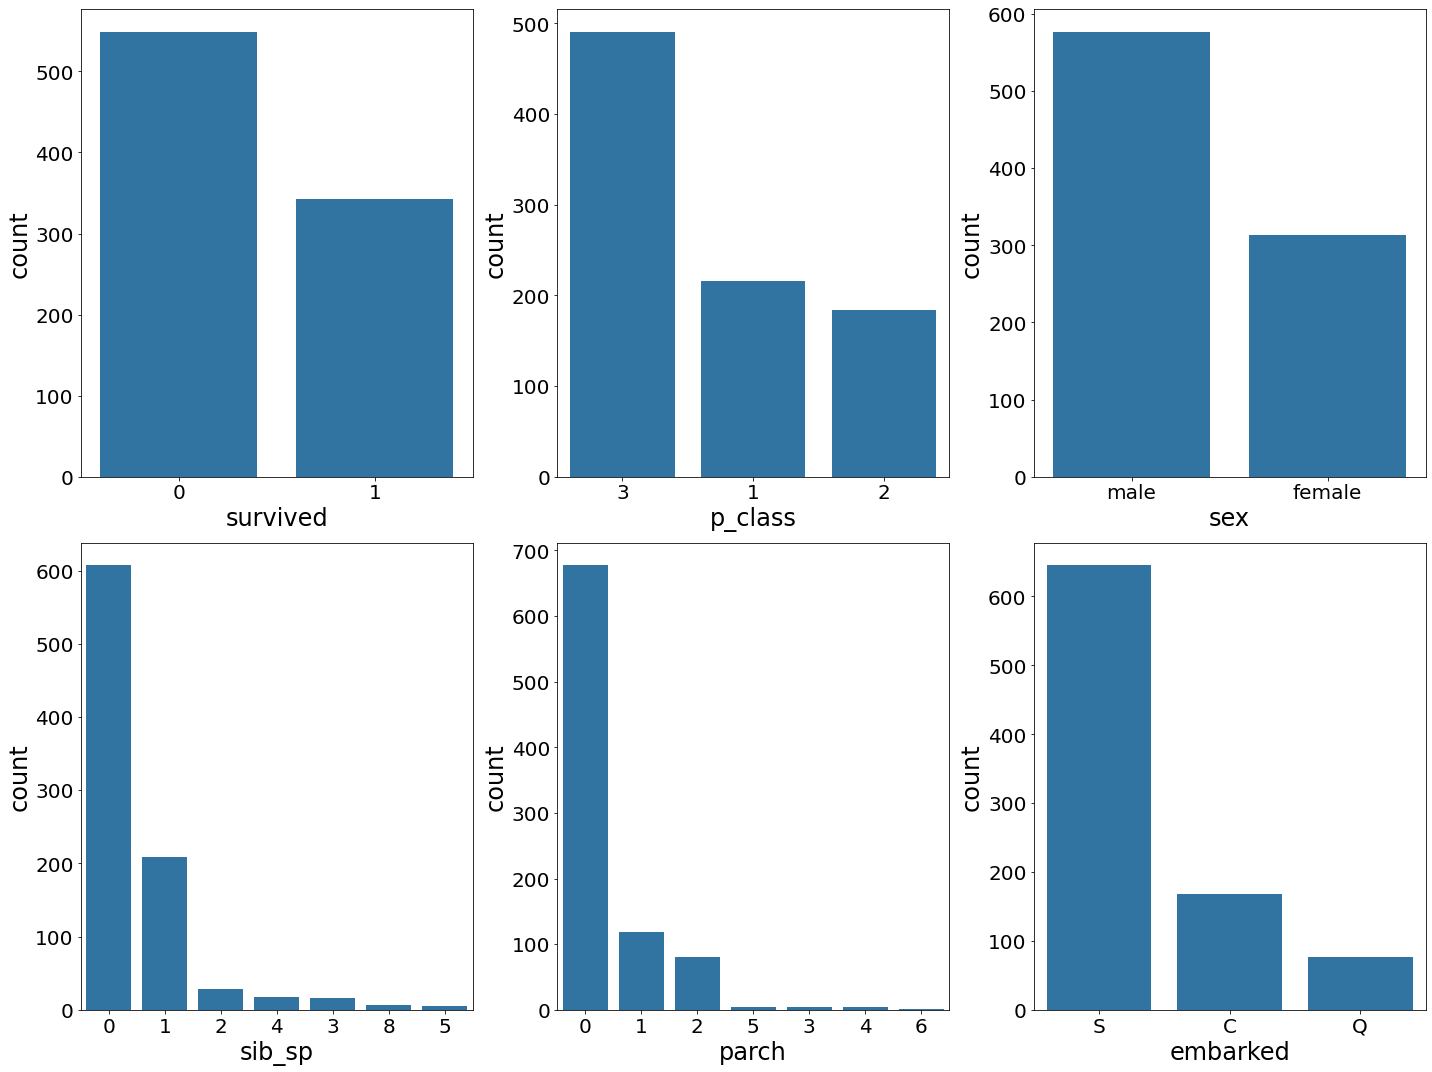

In [19]:
# Bar chart plot of categorical variables.
fig, ax = plt.subplots(2, 3, figsize=(20, 15));
base_color = sns.color_palette()[0]
for variable, subplot in zip(names_cat, ax.flatten()):
    subplot.xaxis.label.set_size(24)
    subplot.yaxis.label.set_size(24)
    subplot.tick_params('y', labelsize = 20);
    subplot.tick_params('x', labelsize = 20);
    cat_order = df_train_cat[variable].value_counts().index
    # get proportion taken by most common group for derivation of tick marks
    n_points = df_train_cat[variable].shape[0]
    max_count = df_train_cat[variable].value_counts().max()
    max_prop = max_count / n_points
    # generate tick mark locations and names
    tick_props = np.arange(0, max_prop, 0.05)
    tick_names = ['{:0.2f}'.format(v) for v in tick_props]
    # create the plot
    cp = sns.countplot(data = df_train_cat, x = variable, order = cat_order, ax=subplot, color=base_color)
 #   _ = subplot.set_yticks(tick_props * n_points, tick_names)
 #  _ = subplot.set_ylabel('proportion')

#    cp = sns.countplot(x=df_train_cat[variable], ax=subplot);
#    cp = sns.barplot(x = variable, data=df_train_cat[variable], ax=subplot, estimator=lambda x: len(x) / len
    #    (df_train_cat[variable]) * 100); plt.tight_layout()
#    df_plot = df_train_cat[variable]
#    df_plot_list = df_train_cat[variable].to_list()
#    cp = sns.barplot(x = variable, y= variable, data=df_train_cat, ax=subplot, estimator=lambda df_plot_list: len (df_plot_list) / len (df_plot) * 100);

#    df_train_cat.columns = df_train_cat.columns.get_level_values(0)
#    avg = df_train_cat[[variable, 'survived']].groupby([variable], as_index=False).mean()
#    _ = sns.barplot(x=variable, y='survived', hue=variable, data=avg, ax=subplot)

#for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
#    t.set_text(l)
#for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
#    t.set_text(l)
#
#    cp = sns.barplot(x = variable, y= variable, data=df_train_cat, ax=subplot);
    plt.tight_layout()

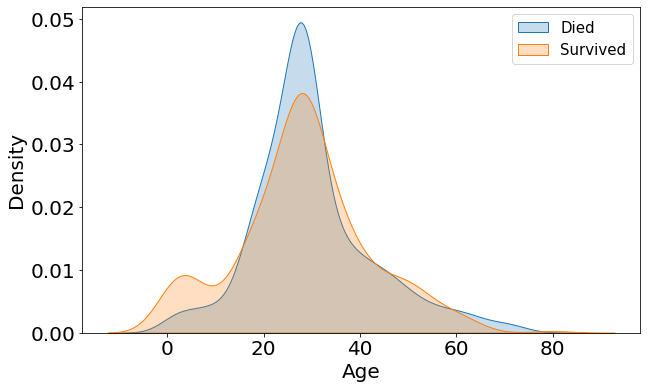

,fare,age
count,891.000000,891.000000
mean,32.204208,29.361582
std,49.693429,13.019697
min,0.000000,0.420000
25%,7.910400,22.000000
50%,14.454200,28.000000
75%,31.000000,35.000000
max,512.329200,80.000000


In [20]:
# Continuous density plot
fig_age, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), squeeze=False)
_ = plotAge(df=df_train_con_plot, axes=axes, single_plot=True);

# 5 number summary.
df_train_con.describe()


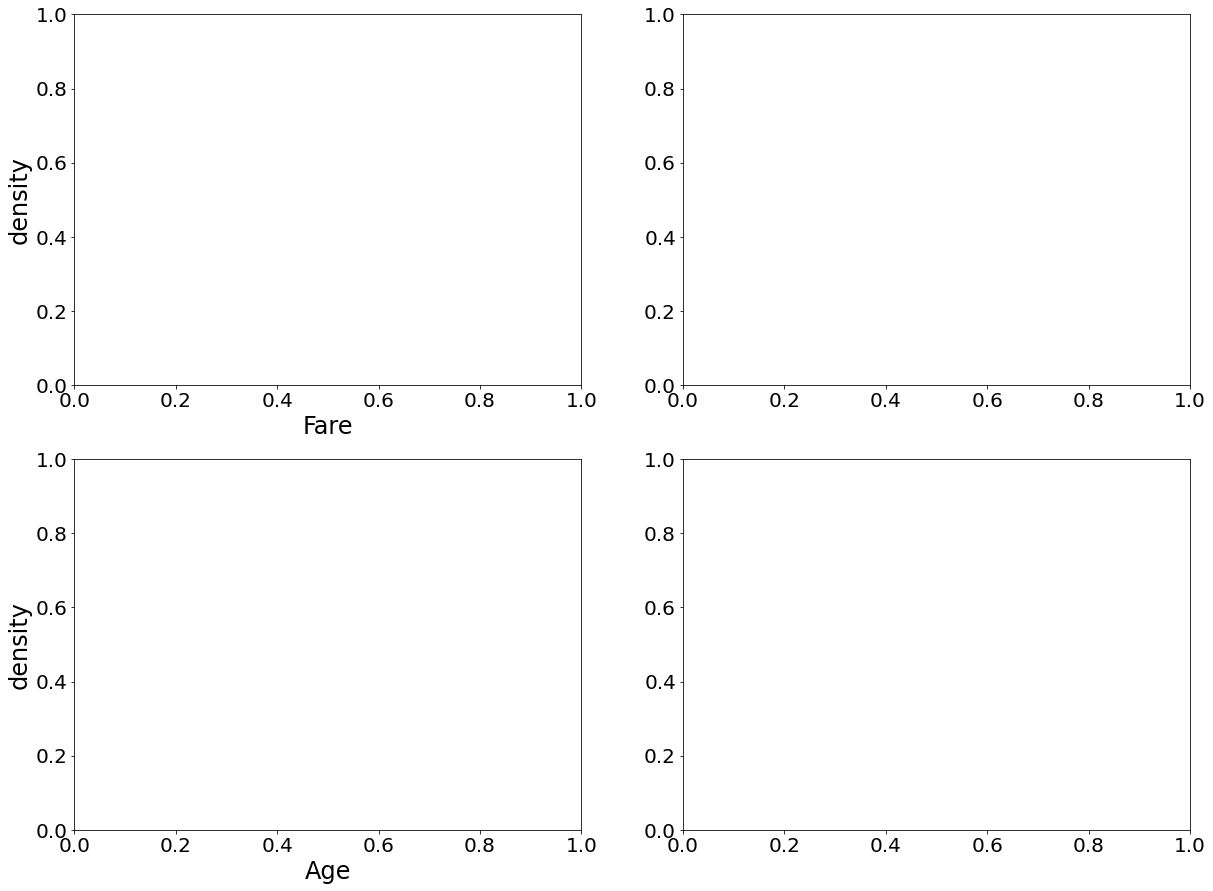

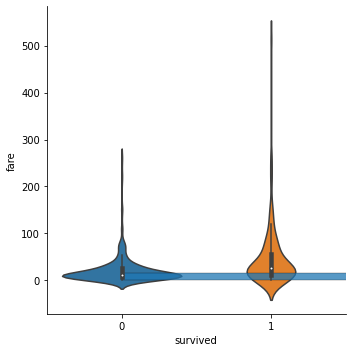

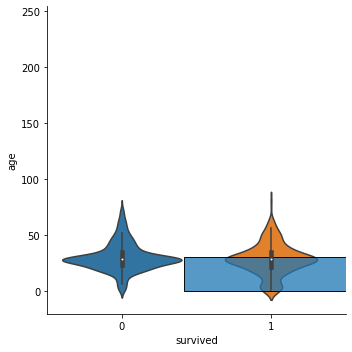

In [21]:
# Continuous density plot
fig_continuous, axes = plt.subplots(nrows=len(names_con_plot)-1, ncols=2, figsize=(20, 15))
_ = plotVar(isCategorical=False, categorical = plot_cat, continuous = plot_con, df=df_train_con_plot, axes=axes);

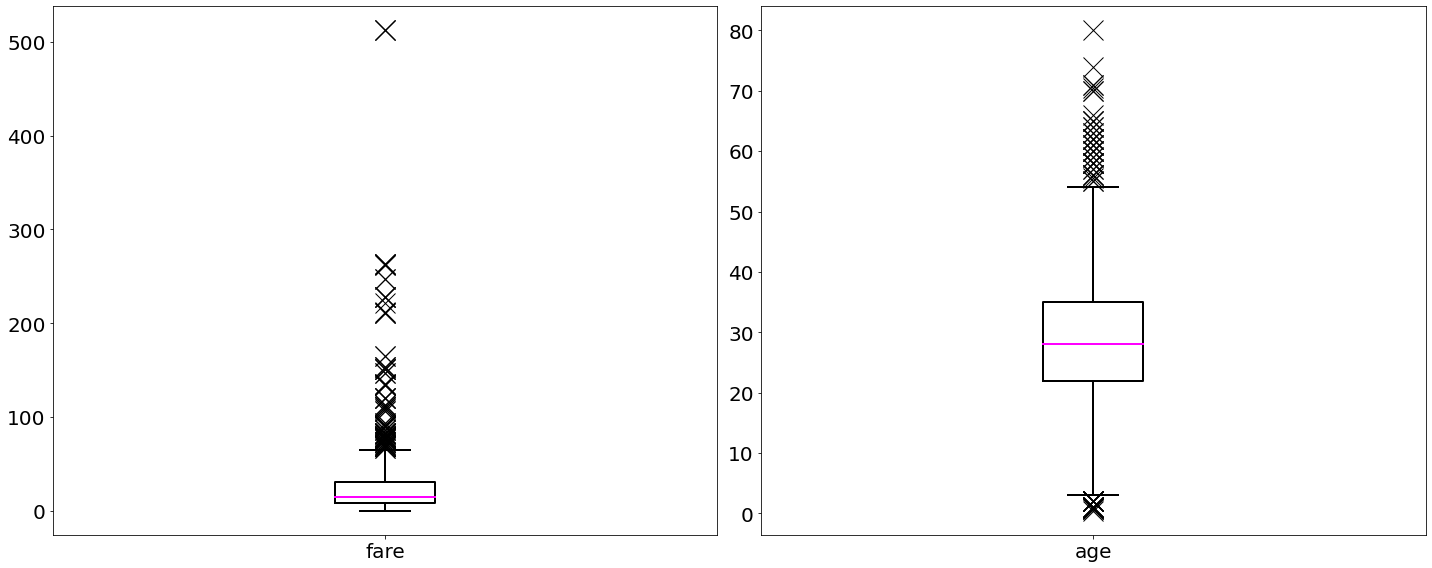

In [22]:
# Boxplot of continuous variables
medianprops = {'color': 'magenta', 'linewidth': 2}
boxprops = {'color': 'black', 'linestyle': '-', 'linewidth': 2}
whiskerprops = {'color': 'black', 'linestyle': '-', 'linewidth': 2}
capprops = {'color': 'black', 'linestyle': '-', 'linewidth': 2}
flierprops = {'color': 'black', 'marker': 'x', 'markersize': 20}

_ = df_train_con.plot(kind='box', subplots=True, figsize=(20, 8), layout=(1,2), fontsize = 20, medianprops=medianprops,
                    boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops);
_ = plt.tight_layout();
_ = plt.show();


<div class="alert alert-block alert-info">
<b>Transform variables</b>
</div>

We start by splitting the response and the features.

In [23]:
# Group response values to form binary response
y = df_train.loc[:, 'survived']

# Split data into features (X) and response (y)
X = df_train.loc[:, ('p_class', 'sex', 'age', 'sib_sp', 'parch', 'fare', 'embarked')]

X.head()

# Put the response y into an array
y = np.ravel(y)

,p_class,sex,age,sib_sp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [24]:
# Transform sex variable
X['sex'] = X['sex'].apply(lambda x: 1 if x == 'female' else 0)
X.head()

,p_class,sex,age,sib_sp,parch,fare,embarked
0,3,0,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C
2,3,1,26.0,0,0,7.9250,S
3,1,1,35.0,1,0,53.1000,S
4,3,0,35.0,0,0,8.0500,S


In [25]:
# Same transformation for test set.
df_test['sex'] = df_test['sex'].apply(lambda x: 1 if x == 'female' else 0)
df_test.head()

,p_class,sex,age,sib_sp,parch,fare,cabin,embarked
0,3,0,34.5,0,0,7.8292,NaN,Q
1,3,1,47.0,1,0,7.0000,NaN,S
2,2,0,62.0,0,0,9.6875,NaN,Q
3,3,0,27.0,0,0,8.6625,NaN,S
4,3,1,22.0,1,1,12.2875,NaN,S


In [26]:
# Transform embarked variable
ohe = OneHotEncoder(categories='auto', drop='first')
Xd = ohe.fit_transform(X.embarked.values.reshape(-1, 1)).toarray()
df_ohe = pd.DataFrame(Xd, columns = ohe.get_feature_names())
print(df_ohe)

     x0_Q  x0_S
0     0.0   1.0
1     0.0   0.0
2     0.0   1.0
3     0.0   1.0
4     0.0   1.0
..    ...   ...
886   0.0   1.0
887   0.0   1.0
888   0.0   1.0
889   0.0   0.0
890   1.0   0.0

[891 rows x 2 columns]


In [27]:
X = pd.concat([X.loc[:, ['p_class', 'sex', 'age', 'sib_sp', 'parch', 'fare']], df_ohe], axis=1)
X.head()

,p_class,sex,age,sib_sp,parch,fare,x0_Q,x0_S
0,3,0,22.0,1,0,7.2500,0.0,1.0
1,1,1,38.0,1,0,71.2833,0.0,0.0
2,3,1,26.0,0,0,7.9250,0.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,1.0
4,3,0,35.0,0,0,8.0500,0.0,1.0


In [28]:
# Transform embarked variable for test set
ohe2 = OneHotEncoder(categories='auto', drop='first')
Xd2 = ohe2.fit_transform(df_test.embarked.values.reshape(-1, 1)).toarray()
df_ohe2 = pd.DataFrame(Xd2, columns = ohe.get_feature_names())
print(df_ohe2)

     x0_Q  x0_S
0     1.0   0.0
1     0.0   1.0
2     1.0   0.0
3     0.0   1.0
4     0.0   1.0
..    ...   ...
413   0.0   1.0
414   0.0   0.0
415   0.0   1.0
416   0.0   1.0
417   0.0   0.0

[418 rows x 2 columns]


In [29]:
df_test = pd.concat([df_test.loc[:, ['p_class', 'sex', 'age', 'sib_sp', 'parch', 'fare']], df_ohe2], axis=1)
df_test.head()


,p_class,sex,age,sib_sp,parch,fare,x0_Q,x0_S
0,3,0,34.5,0,0,7.8292,1.0,0.0
1,3,1,47.0,1,0,7.0000,0.0,1.0
2,2,0,62.0,0,0,9.6875,1.0,0.0
3,3,0,27.0,0,0,8.6625,0.0,1.0
4,3,1,22.0,1,1,12.2875,0.0,1.0


In [30]:
print(df_test.isnull().sum())

p_class    0
sex        0
age        0
sib_sp     0
parch      0
fare       0
x0_Q       0
x0_S       0
dtype: int64


### Split the data into training and test sets

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#X_train = X
#y_train = y

In [32]:
print('Percentage holdout data: {}%'.format(round(100*(len(X_test)/len(X)),0)))

Percentage holdout data: 25.0%


In [33]:
# Scale data
scaler = StandardScaler()

# Fit on training data set
scaler.fit(X_train)
X_train = scaler.transform(X_train)

# Apply to test data (training)
X_test = scaler.transform(X_test)

# Apply to final test data
df_test = scaler.transform(df_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

<div class="alert alert-block alert-info">
<b>Build Model</b>
</div>

We can now start building our model.
We begin with a simple Multi Layer Perceptron using scikit-learn to better understand the data.

### MSE before model optimisation

In [34]:
# Fit and check MSE before regularisation
reg = MLPClassifier(max_iter=50000, solver="adam", activation="tanh", hidden_layer_sizes=(5, 5), random_state=1)
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)

# Accuracy before model parameter optimisation
accuracy_score(y_pred,y_test)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=50000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

0.8161434977578476

We now optimise the NN architecture.

In [35]:
# Optimise numbers of nodes on both layers
validation_scores = {}
print("Nodes |Validation")
print("      | score")

for hidden_layer_size in [(i,j) for i in range(2,6) for j in range(2,6)]:

    reg = MLPClassifier(max_iter=1000000, hidden_layer_sizes=hidden_layer_size, random_state=1)

    score = cross_val_score(estimator=reg, X=X_train, y=y_train, cv=2)
    validation_scores[hidden_layer_size] = score.mean()
    print(hidden_layer_size, ": %0.5f" % validation_scores[hidden_layer_size])

Nodes |Validation
      | score
(2, 2) : 0.80689
(2, 3) : 0.75000
(2, 4) : 0.79790
(2, 5) : 0.82186
(3, 2) : 0.78593
(3, 3) : 0.77246
(3, 4) : 0.79341
(3, 5) : 0.79042
(4, 2) : 0.79790
(4, 3) : 0.80988
(4, 4) : 0.80240
(4, 5) : 0.80539
(5, 2) : 0.79192
(5, 3) : 0.76796
(5, 4) : 0.80389
(5, 5) : 0.79790


In [36]:
# Check scores
print("The highest validation score is: %0.4f" % max(validation_scores.values()))
optimal_hidden_layer_size = [name for name, score in validation_scores.items()
                              if score==max(validation_scores.values())][0]
print("This corresponds to nodes", optimal_hidden_layer_size )


The highest validation score is: 0.8219
This corresponds to nodes (2, 5)


Now we optimise neural network regularisation parameter

 alpha  |  Accuracy
0.13534 |  0.7964071856287425
0.22313 |  0.7964071856287425
0.36788 |  0.7934131736526946
0.60653 |  0.7964071856287425
1.00000 |  0.7919161676646707
1.64872 |  0.7964071856287425
2.71828 |  0.7934131736526946
4.48169 |  0.7994011976047904
7.38906 |  0.8083832335329342
12.18249 |  0.8023952095808383
20.08554 |  0.6137724550898204
33.11545 |  0.6137724550898204


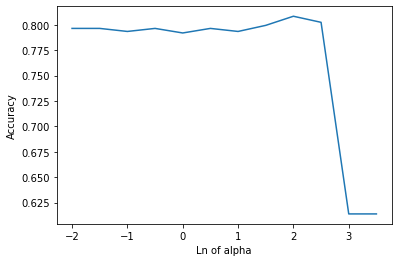

In [37]:
# Select range over which to find regularisation parameter - exponential used for even distribution of values
reg_par = [np.e**n for n in np.arange(-2,4,0.5)]

validation_scores = {}
print(" alpha  |  Accuracy")
for param in reg_par:
    reg = MLPClassifier(max_iter=1000000, solver="adam", activation="tanh", hidden_layer_sizes=optimal_hidden_layer_size, alpha=param,
                        random_state=1)
    score = cross_val_score(estimator=reg, X=X_train, y=y_train, cv=2, scoring="accuracy")
    validation_scores[param] = score.mean()
    print("%0.5f |  %s" % (param, score.mean()))

# Plot the accuracy function against regularisation parameter
plt.plot([np.log(i) for i in validation_scores.keys()], list(validation_scores.values()));
plt.xlabel("Ln of alpha");
plt.ylabel("Accuracy");

The highest cross-validation accuracy score and hence the value to use for the `alpha` parameter is as follows.

In [38]:
max_score = ([np.log(name) for name, score in validation_scores.items() if score==max(validation_scores.values())][0])
# Find lowest value.
print("The highest accuracy score is: %s" % (max(validation_scores.values())))
print("This corresponds to regularisation parameter e**%s" % max_score)

The highest accuracy score is: 0.8083832335329342
This corresponds to regularisation parameter e**2.0


### MSE after regularisation

In [39]:
# Fit data with the best parameter
reg = MLPClassifier(max_iter=1000000, solver="adam", activation="tanh", hidden_layer_sizes=optimal_hidden_layer_size,
                    alpha=np.e**(2), random_state=1)

reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)

# Accuracy after model parameter optimisation
accuracy_score(y_pred,y_test)

MLPClassifier(activation='tanh', alpha=7.3890560989306495, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

0.7937219730941704

### Accuracy analysis

In [40]:
accuracy = round(accuracy_score(y_pred=y_pred, y_true=y_test), 3)
precision = round(precision_score(y_pred=y_pred, y_true=y_test), 3)
recall = round(recall_score(y_pred=y_pred, y_true=y_test), 3)
cm = confusion_matrix(y_pred=y_pred, y_true=y_test)

fp_label='false positive'
fp = cm[0][1]
fn_label='false negative'
fn = cm[1][0]
tp_label='true positive'
tp = cm[1][1]
tn_label='true negative'
tn = cm[0][0]

tpr_label = 'sensitivity'
tpr = round(tp/(tp+fn),3)
tnr_label = 'specificity'
tnr = round(tn/(tn+fp),3)
ppv_label = 'precision'
ppv = round(tp/(tp+fp),3)
npv_label = 'npv'
npv = round(tn/(tn+fn),3)
fpr_label = 'fpr'
fpr = round(fp/(fp+tn),3)
fnr_label = 'fnr'
fnr = round(fn/(tp+fn),3)
fdr_label = 'fdr'
fdr = round(fp/(tp+fp),3)

print('\naccuracy:\t\t\t{}  \nprecision:\t\t\t{} \nrecall:\t\t\t\t{}'.format(accuracy, precision, recall))
print('\nsensitivity:\t\t\t{}  \nspecificity:\t\t\t{} \nnegative predictive value:\t{}'.format(tpr, tnr, npv))
print('\nfalse positive rate:\t\t{}  \nfalse negative rate:\t\t{} \nfalse discovery rate:\t\t{}'.format(fpr, fnr, fdr))


accuracy:			0.794  
precision:			0.75 
recall:				0.679

sensitivity:			0.679  
specificity:			0.863 
negative predictive value:	0.816

false positive rate:		0.137  
false negative rate:		0.321 
false discovery rate:		0.25


7
Feature:    p_class	Score:	0.13526
Feature:        sex	Score:	0.49185
Feature:        age	Score:	0.11971
Feature:     sib_sp	Score:	0.07073
Feature:      parch	Score:	0.00574
Feature:       fare	Score:	0.15124
Feature:       x0_Q	Score:	0.01817
Feature:       x0_S	Score:	0.00729


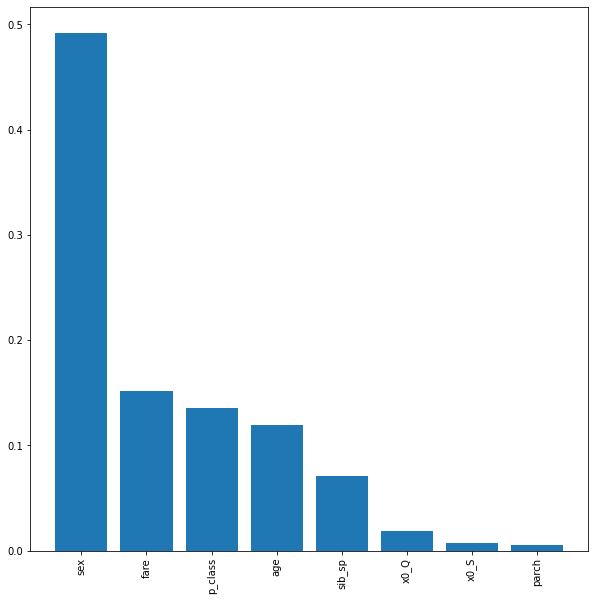

In [41]:
# Fit a Decision Tree to data
samples = [sample for sample in range(1,30)]
validation_scores = []
for sample in samples:
    classifier1 = DecisionTreeClassifier(random_state=1, min_samples_leaf=sample)
    score = cross_val_score(estimator=classifier1, X=X_train, y=y_train, cv=5)
    validation_scores.append(score.mean())

# Obtain the minimum leaf samples with the highest validation score
samples_optimum = samples[validation_scores.index(max(validation_scores))]
print(samples_optimum)

classifier2 = DecisionTreeClassifier(random_state=0, min_samples_leaf=samples_optimum)
classifier2.fit(X_train, y_train)

importances = np.array(classifier2.feature_importances_)
feature_list = np.array(X.columns)

# summarize feature importance
for i,v in enumerate(importances):
	print('Feature: %10s\tScore:\t%.5f' % (feature_list[i],v))
# plot feature importance
sorted_ID=np.array(np.argsort(importances)[::-1])
plt.figure(figsize=[10,10])
plt.xticks(rotation='vertical')
_ = plt.bar(feature_list[sorted_ID], importances[sorted_ID]);
plt.show();


In [42]:
# Not very convincing results, next we will look at random forests and logistic regression
# as means to detect feature importance.
rand_forest = RandomForestClassifier(criterion= 'gini', random_state=0)
rand_forest.fit(X_train, y_train)

# Probability scores for test set
y_pred = rand_forest.predict(X_test)

accuracy_score(y_pred,y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

0.8385650224215246

In [43]:
# Final prediction - MLP
#y_pred = reg.predict(df_test)

# Final prediction - Random Forest
y_pred = rand_forest.predict(df_test)

#Prepare submission code
my_submission = pd.DataFrame({'PassengerId': df_orig.passenger_id, 'Survived': y_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)